In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

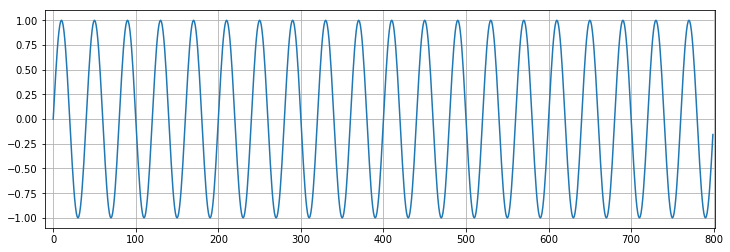

In [2]:
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [3]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

In [4]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [5]:
window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

len(train_data) # this should equal 760-40

720

In [7]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [10]:
torch.set_printoptions(sci_mode=False) # to improve the appearance of tensors

In [11]:
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

In [12]:
train_data[1]

(tensor([     0.1564,      0.3090,      0.4540,      0.5878,      0.7071,
              0.8090,      0.8910,      0.9511,      0.9877,      1.0000,
              0.9877,      0.9511,      0.8910,      0.8090,      0.7071,
              0.5878,      0.4540,      0.3090,      0.1564,     -0.0000,
             -0.1564,     -0.3090,     -0.4540,     -0.5878,     -0.7071,
             -0.8090,     -0.8910,     -0.9511,     -0.9877,     -1.0000,
             -0.9877,     -0.9511,     -0.8910,     -0.8090,     -0.7071,
             -0.5878,     -0.4540,     -0.3090,     -0.1564,      0.0000]),
 tensor([0.1564]))

In [13]:
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=50,out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        self.linear = nn.Linear(hidden_size,out_size)
        
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [14]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [15]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


Epoch:  1 Loss: 0.00009303
Loss on test predictions: 0.003490318777039647


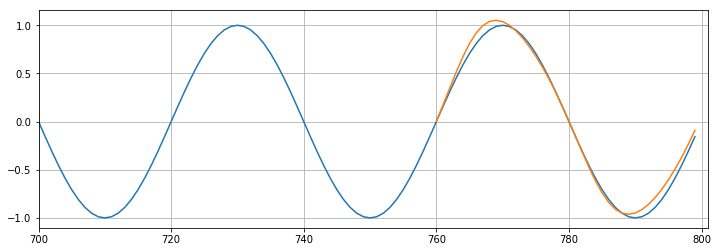

Epoch:  2 Loss: 0.00008840
Loss on test predictions: 0.003329710802063346


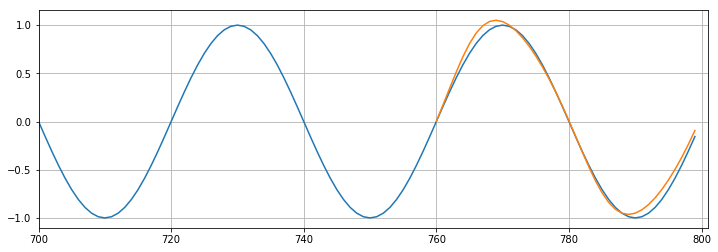

Epoch:  3 Loss: 0.00008399
Loss on test predictions: 0.0031871101818978786


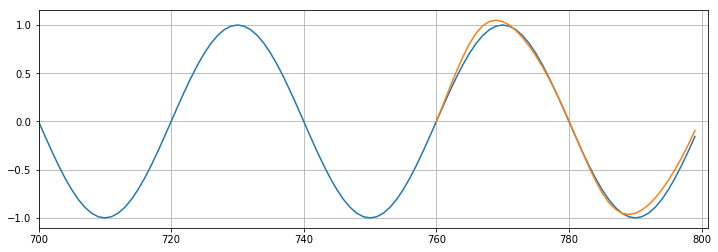

Epoch:  4 Loss: 0.00007982
Loss on test predictions: 0.0030600104946643114


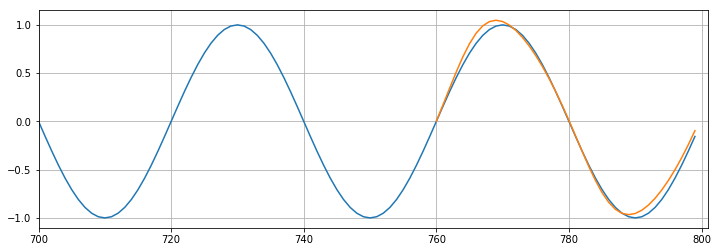

Epoch:  5 Loss: 0.00007588
Loss on test predictions: 0.0029460820369422436


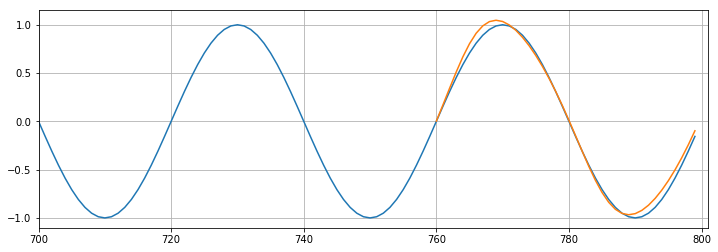

Epoch:  6 Loss: 0.00007217
Loss on test predictions: 0.0028435951098799706


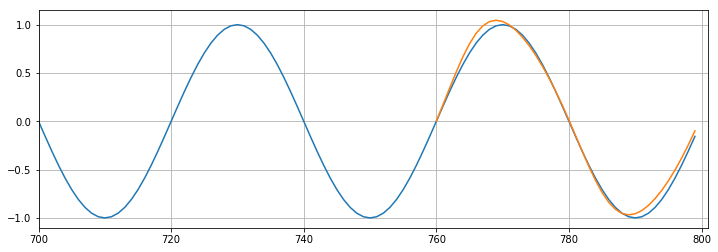

Epoch:  7 Loss: 0.00006868
Loss on test predictions: 0.0027508665807545185


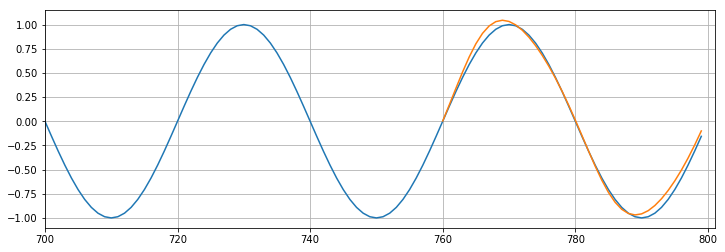

Epoch:  8 Loss: 0.00006541
Loss on test predictions: 0.0026667085476219654


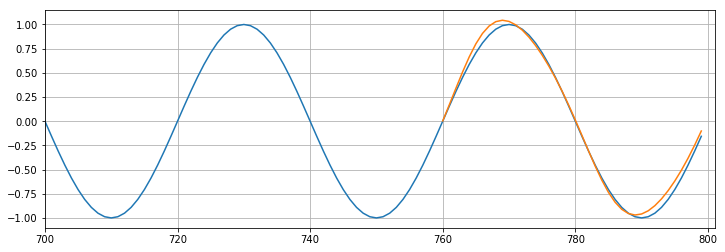

Epoch:  9 Loss: 0.00006235
Loss on test predictions: 0.002589796669781208


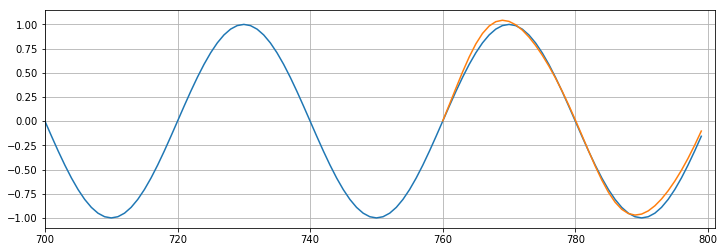

Epoch: 10 Loss: 0.00005948
Loss on test predictions: 0.002519556786864996


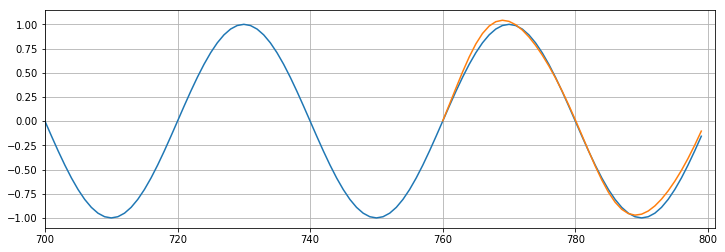

Epoch: 11 Loss: 0.00005679
Loss on test predictions: 0.002454810542985797


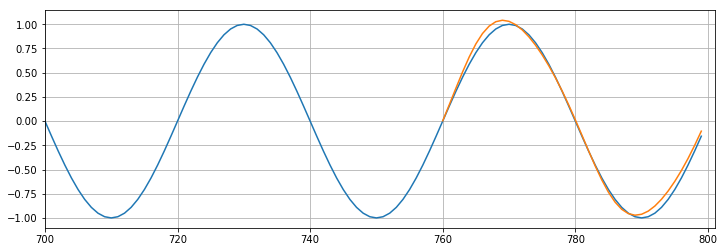

Epoch: 12 Loss: 0.00005428
Loss on test predictions: 0.0023951500188559294


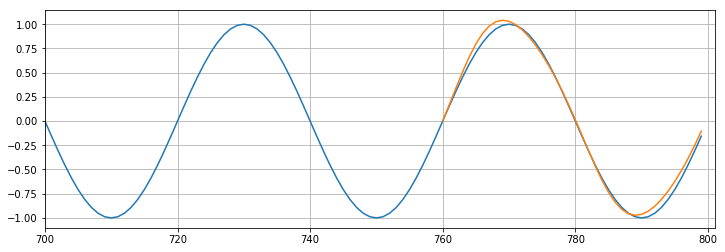

Epoch: 13 Loss: 0.00005192
Loss on test predictions: 0.0023398997727781534


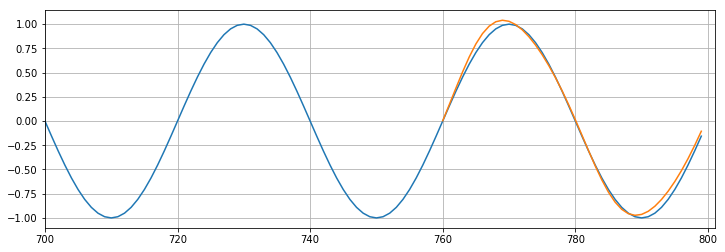

Epoch: 14 Loss: 0.00004970
Loss on test predictions: 0.0022885575890541077


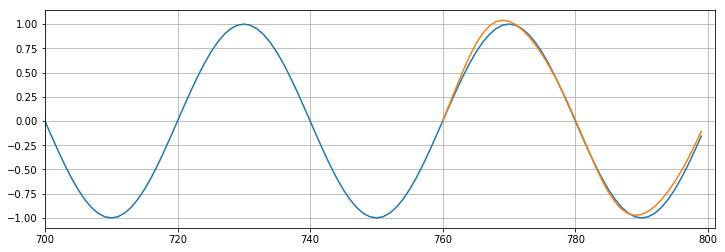

Epoch: 15 Loss: 0.00004763
Loss on test predictions: 0.0022406221833080053


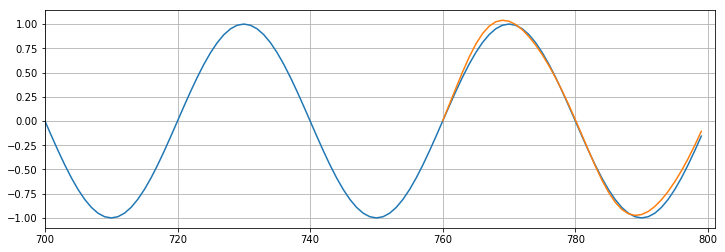

Epoch: 16 Loss: 0.00004568
Loss on test predictions: 0.002195848850533366


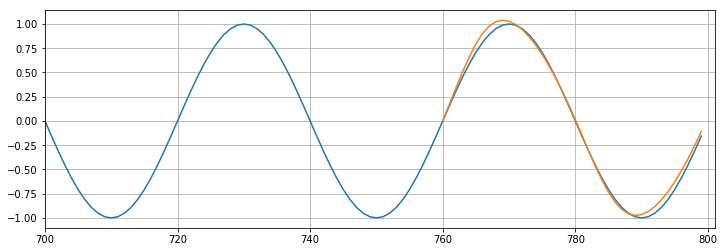

Epoch: 17 Loss: 0.00004384
Loss on test predictions: 0.0021537744905799627


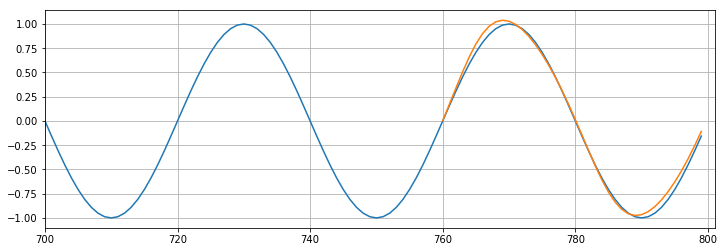

Epoch: 18 Loss: 0.00004212
Loss on test predictions: 0.002114210044965148


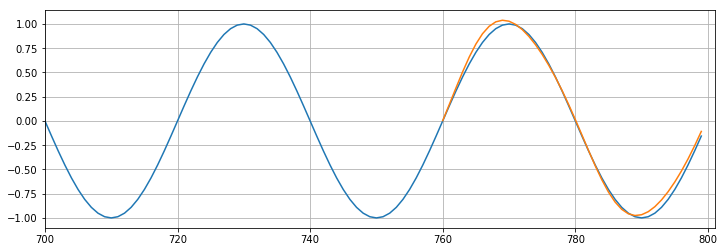

Epoch: 19 Loss: 0.00004050
Loss on test predictions: 0.002076818374916911


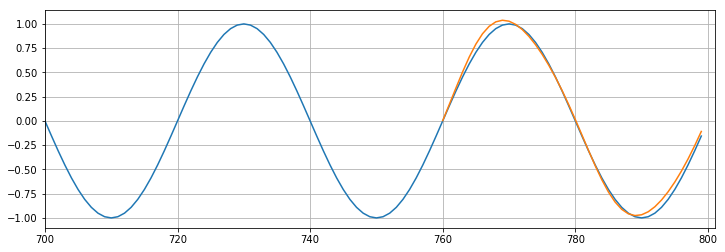

Epoch: 20 Loss: 0.00003897
Loss on test predictions: 0.0020415314938873053


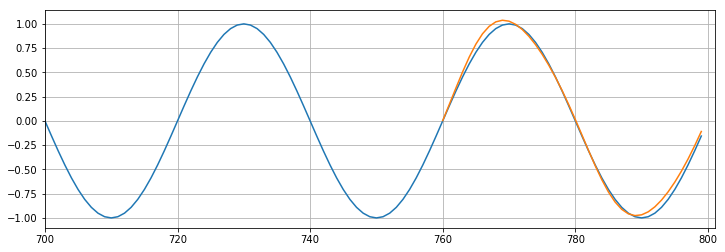

Epoch: 21 Loss: 0.00003753
Loss on test predictions: 0.002008003881201148


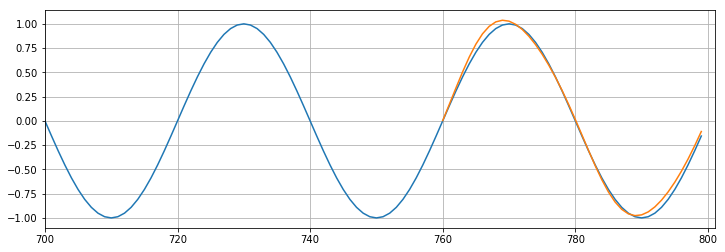

Epoch: 22 Loss: 0.00003617
Loss on test predictions: 0.001976180821657181


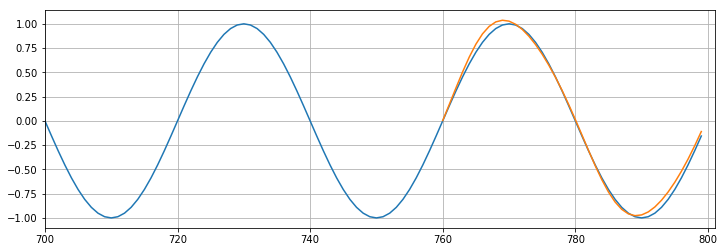

Epoch: 23 Loss: 0.00003488
Loss on test predictions: 0.0019457825692370534


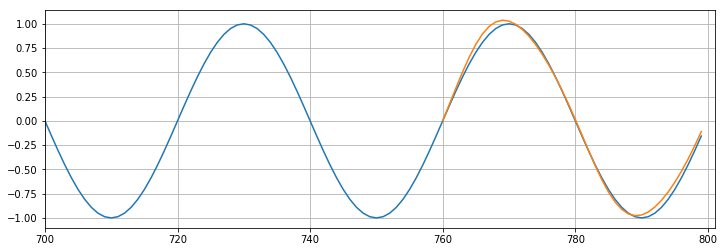

Epoch: 24 Loss: 0.00003366
Loss on test predictions: 0.0019167725695297122


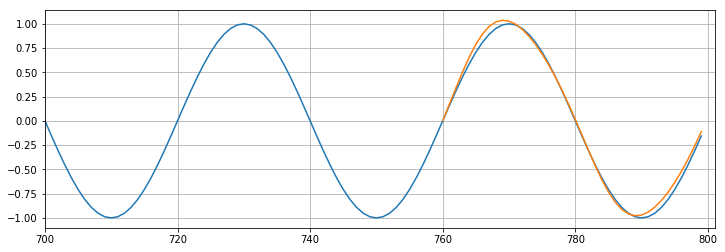

Epoch: 25 Loss: 0.00003251
Loss on test predictions: 0.001888996921479702


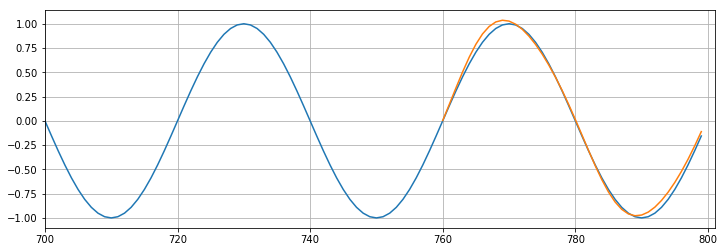

Epoch: 26 Loss: 0.00003141
Loss on test predictions: 0.0018623920623213053


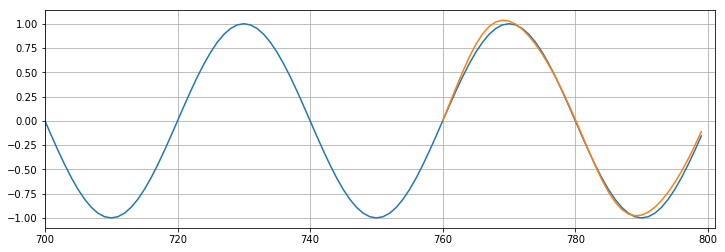

Epoch: 27 Loss: 0.00003037
Loss on test predictions: 0.001836841576732695


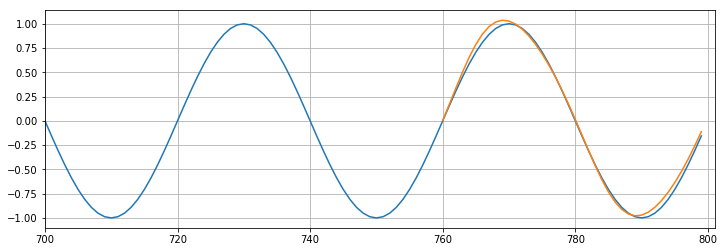

Epoch: 28 Loss: 0.00002938
Loss on test predictions: 0.0018122212495654821


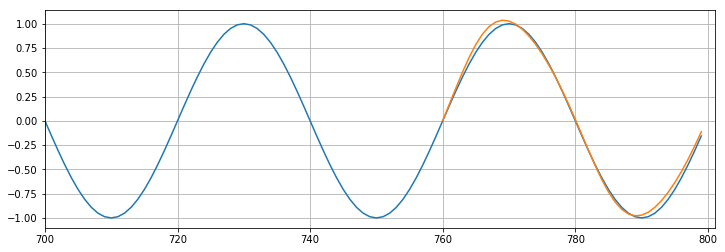

Epoch: 29 Loss: 0.00002844
Loss on test predictions: 0.0017885681008920074


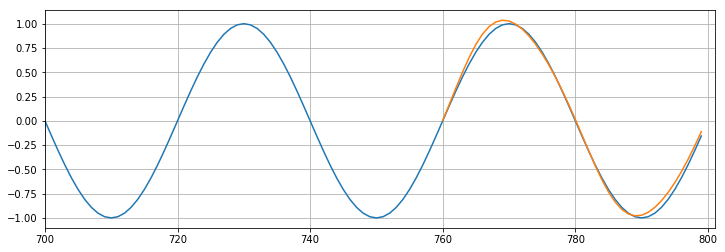

Epoch: 30 Loss: 0.00002755
Loss on test predictions: 0.0017656962154433131


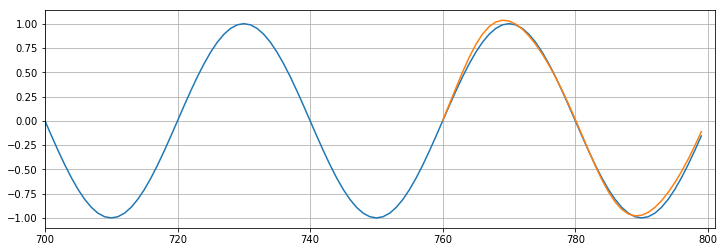

In [20]:
epochs = 30
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [22]:
epochs = 10
window_size = 40
future = 40

# Create the full set of sequence/label tuples:
all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [23]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00002664
Epoch:  2 Loss: 0.00002579
Epoch:  3 Loss: 0.00002497
Epoch:  4 Loss: 0.00002419
Epoch:  5 Loss: 0.00002345
Epoch:  6 Loss: 0.00002275
Epoch:  7 Loss: 0.00002207
Epoch:  8 Loss: 0.00002142
Epoch:  9 Loss: 0.00002080
Epoch: 10 Loss: 0.00002020

Duration: 95 seconds


## Predict future values, plot the result

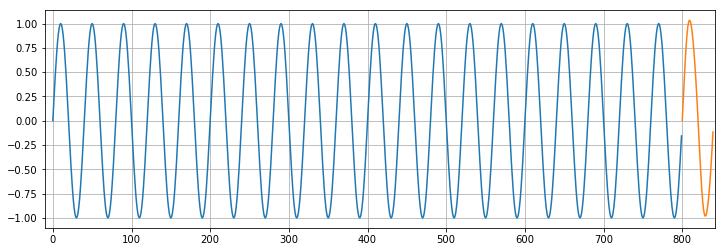

In [24]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()